YOUR NAME
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [1]:
import pandas as pd

mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [2]:
# Split the data into targets and features
target = mushrooms_df['type']
features = mushrooms_df.drop(columns=['type'])

print("Target:")
print(target.unique())
print("\nFeatures:")
print(features.head())

Target:
['p' 'e']

Features:
  cap_shape cap_surface cap_color bruises odor gill_attachment gill_spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill_size gill_color stalk_shape  ... stalk_surface_below_ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0              

In [3]:
# ordinal and categorical features
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'gill_attachment', 'gill_spacing',
                        'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                        'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color',
                        'habitat']
ordinal_features = ['odor', 'veil_type','population']


# Ordinal encoding for ordinal features
ordinal_transformer = OrdinalEncoder()

# One-hot encoding for categorical features
categorical_transformer = OneHotEncoder() 

# Combine the transformations into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the transformation to the features
X_encoded = preprocessor.fit_transform(features)




In [4]:
from sklearn.model_selection import train_test_split


y = mushrooms_df['type']  
X = mushrooms_df.drop(columns=['type']) 


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)





from sklearn.linear_model import LogisticRegressionCV

# Logistic regression with 5-fold cross-validation
log_reg = LogisticRegressionCV(cv=5, random_state=42)
log_reg.fit(X_train, y_train)






from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
dt_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=5)

# Train the Decision Tree model
dt_grid_search.fit(X_train, y_train)








from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Set up the grid search
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5)

# Train the Random Forest model
rf_grid_search.fit(X_train, y_train)

# Logistic Regression predictions
log_reg_preds = log_reg.predict(X_test)

# Decision Tree predictions
dt_preds = dt_grid_search.best_estimator_.predict(X_test)

# Random Forest predictions
rf_preds = rf_grid_search.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Confusion matrices
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_preds))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_preds))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))








Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Logistic Regression Confusion Matrix:
[[843   0]
 [  0 782]]
Decision Tree Confusion Matrix:
[[843   0]
 [  0 782]]
Random Forest Confusion Matrix:
[[843   0]
 [  0 782]]


### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: 
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [5]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [7]:

print(nfl_draft.columns)




Index(['Unnamed: 0', 'round', 'season', 'name', 'age', 'position',
       'college_conference', 'height', 'weight', 'forty', 'vertical',
       'broad_jump', 'cone', 'shuttle', 'draft_day'],
      dtype='object')


Model Accuracy: 0.5520607375271149


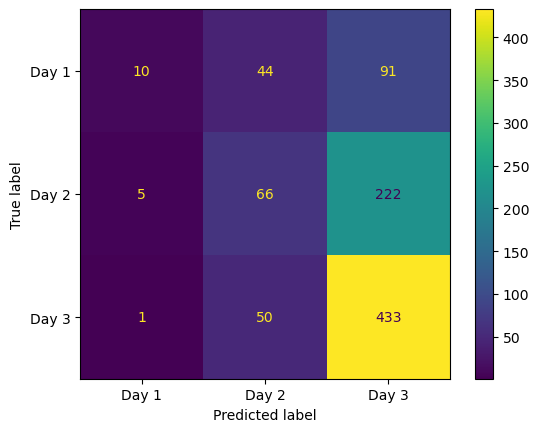

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load the dataset
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

# Create the target variable: draft_day
nfl_draft['draft_day'] = nfl_draft['round'].apply(lambda x: 1 if x == 1 else (2 if x in [2, 3] else 3))

# Separate features and target
y = nfl_draft['draft_day']
features = nfl_draft.drop(columns=['Unnamed: 0', 'round', 'draft_day'])

# Identify columns
categorical_features = ['position', 'college_conference', 'name']
numerical_features = ['season', 'age', 'height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle']

# Preprocessing for numerical features: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.4, random_state=42)

# Full pipeline including preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Day 1', 'Day 2', 'Day 3']).plot()


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?

I chose the random forest classifier as it should provide the most accurate model compared to just one decision tree or a simple linear regression.



 - What was your accuracy?

The accuracy was 0.5509761388286334. I increased the size of the test set to 40% to help increase accuracy